In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [178]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [180]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [181]:
(df == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [182]:
df.shape

(768, 9)

In [183]:
#Pregnancies can be zero
df[(df == 0).sum().index.drop(['Pregnancies','Outcome'])] 

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63
764,122,70,27,0,36.8,0.340,27
765,121,72,23,112,26.2,0.245,30
766,126,60,0,0,30.1,0.349,47


In [184]:
df[(df == 0).sum().index.drop(['Pregnancies','Outcome'])] =df[(df == 0).sum().index.drop(['Pregnancies','Outcome'])].replace(0,np.NaN)

In [185]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [186]:
#FiLL Missing Values by mean
df.fillna(df.mean(), inplace=True)

In [187]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [188]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [189]:
(df == 0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [190]:
#correlation
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


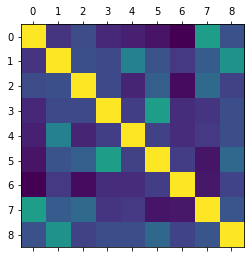

In [191]:
plt.matshow(df.corr())
plt.show()

In [192]:
df.corr().nlargest(5,'Outcome').index

Index(['Outcome', 'Glucose', 'BMI', 'Age', 'Pregnancies'], dtype='object')

1. Logistic Regression
2. SVR

In [193]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

In [194]:
X = df[df.corr().nlargest(4,'Outcome').index.drop('Outcome')]
y = df.iloc[:, 8]

In [195]:
X.head()

,Glucose,BMI,Age
0,148.0,33.6,50
1,85.0,26.6,31
2,183.0,23.3,32
3,89.0,28.1,21
4,137.0,43.1,33


In [196]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [197]:
log_reg = linear_model.LogisticRegression()

In [198]:
log_reg_score = cross_val_score(log_reg,X,y,cv =10,
                                scoring='accuracy').mean()

In [199]:
log_reg_score

0.7669856459330144

In [200]:
results = []
results.append(log_reg_score)

In [201]:
results

[0.7669856459330144]

In [202]:
from sklearn import svm

In [203]:
linear_svm = svm.SVC(kernel='linear')

In [204]:
linear_svm_score = cross_val_score(linear_svm,X,y,cv=10,scoring='accuracy').mean()

In [205]:
linear_svm_score

0.7656527682843473

In [206]:
results.append(linear_svm_score)

In [207]:
results

[0.7669856459330144, 0.7656527682843473]

In [208]:
import pickle

In [209]:
filename = 'diabets.sav'

In [210]:
log_reg.fit(X,y)
pickle.dump(log_reg,open(filename,'wb'))

Model Calling

In [211]:
loaded_model = pickle.load(open(filename,'rb'))

In [212]:
loaded_model

LogisticRegression()

In [213]:
Glucose=65
BMI=55
Age=45
prediction = loaded_model.predict([[Glucose, BMI, Age]])

In [214]:
prediction

array([0], dtype=int64)

In [215]:
Glucose=75
BMI=60
Age=60
prediction = loaded_model.predict([[Glucose, BMI, Age]])

In [216]:
prediction

array([1], dtype=int64)

In [217]:
dfv = pd.read_csv('diabetes_val.csv')
dfv.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,120,93,35,0,33.6,627,50
1,1,88,66,29,0,27.8,351,55
2,8,183,56,0,0,23.3,672,38
3,1,80,66,23,94,28.1,167,57
4,0,137,40,35,168,52.3,2288,33


In [218]:
X1 = dfv[['Glucose', 'BMI', 'Age']]
X1.head()

,Glucose,BMI,Age
0,120,33.6,50
1,88,27.8,55
2,183,23.3,38
3,80,28.1,57
4,137,52.3,33


In [219]:
prediction = loaded_model.predict(X1)
prediction

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [220]:
dfv['Outcome']= prediction
dfv.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,120,93,35,0,33.6,627,50,0
1,1,88,66,29,0,27.8,351,55,0
2,8,183,56,0,0,23.3,672,38,1
3,1,80,66,23,94,28.1,167,57,0
4,0,137,40,35,168,52.3,2288,33,1
